In [26]:
from IPython.display import Image, display_jpeg, display_pretty
from PIL import Image

In [27]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns 
import lux
import numpy as np
from src.funcioncitas import * 

In [28]:
df1 = pd.read_csv('df1_farmaDosis.csv')
df2 = pd.read_csv('df2_dosisEntregadas.csv')
df3 = pd.read_csv('df3_unadosis.csv')
df4 = pd.read_csv('df4_dosiscompleta.csv')
df5 = pd.read_csv('df5_edades_unadosis.csv')
df6 = pd.read_csv('df6_edades_unadosis.csv')

In [29]:
df1

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [4]:
df1.dtypes

ccaa                          object
dosisAdministradas             int64
dosisEntregadas                int64
dosisEntregadasModerna         int64
dosisEntregadasPfizer          int64
dosisEntregadasAstrazeneca     int64
dosisEntregadasJanssen         int64
dosisPrimeraDosis              int64
dosisPautaCompletada           int64
fechaUltRegistro               int64
dtype: object


# DOSIS TOTAL ESPAÑA - VACUNAS  💉

In [30]:
dosistotal_unadosis_dosiscompleta(df1)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [31]:
dosistotal_Spain_Farma(df1)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

## VACUNAS (DISTRIBUCIÓN) POR CCAA

**VACUNAS POR LAS FARMÁCEUTICAS DISTRIBUIDAS**

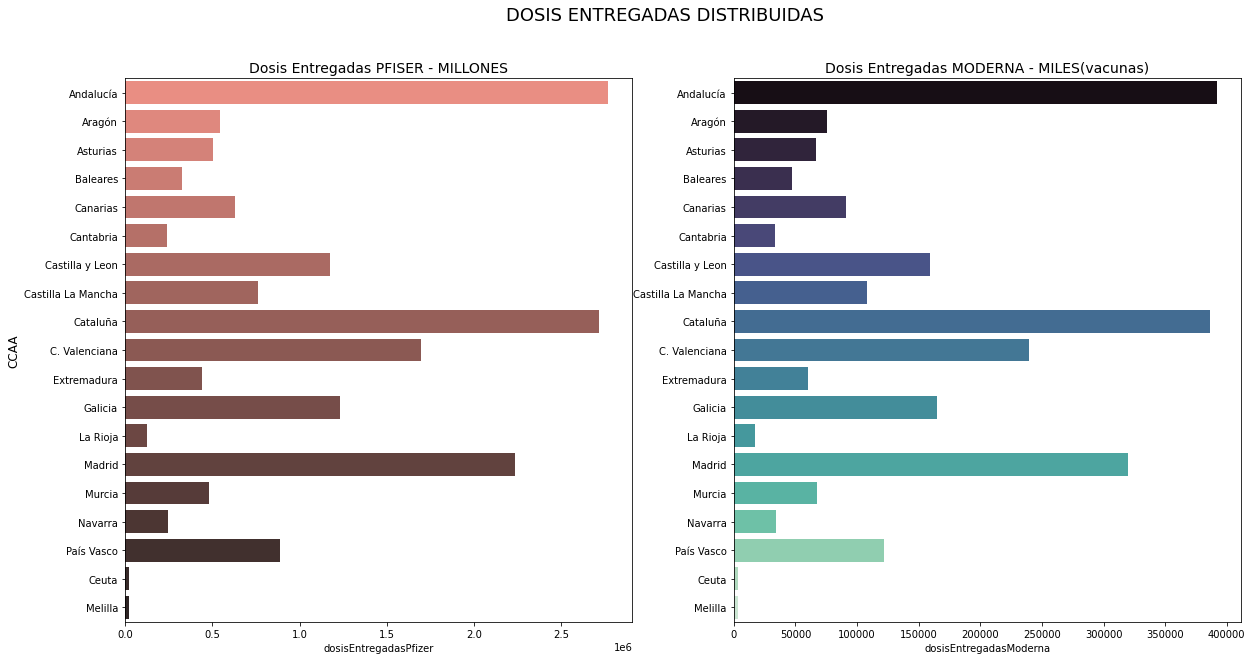

In [32]:
grafica_pfizer_moderna(df1)

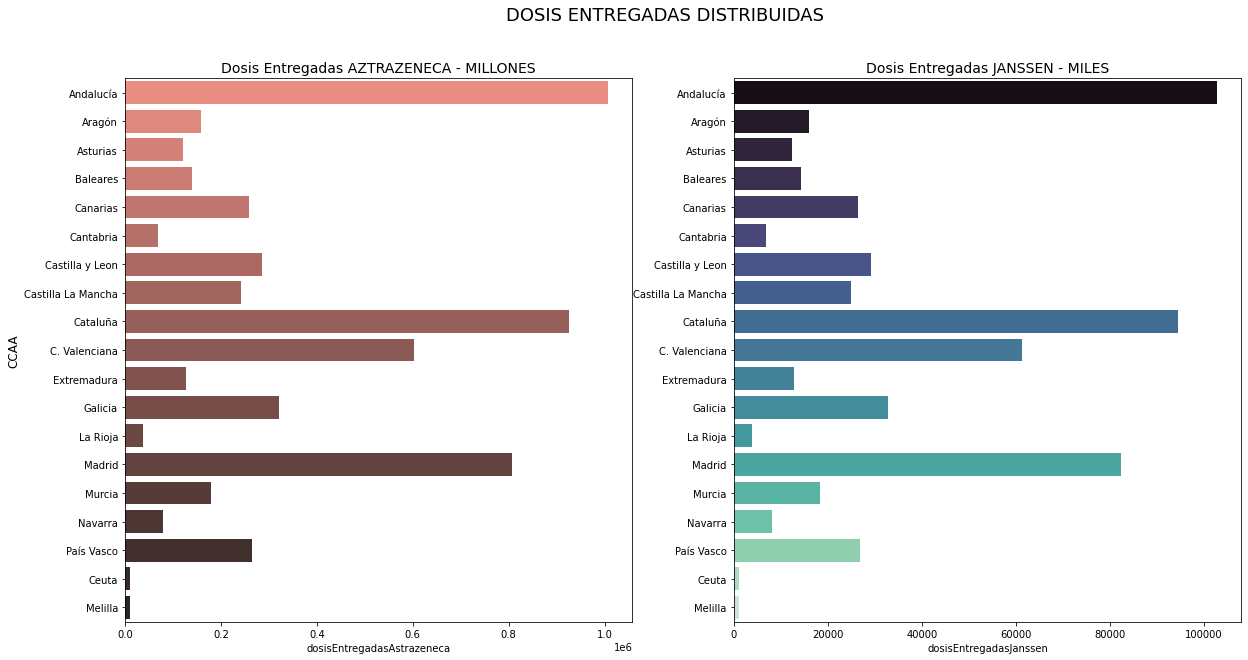

In [33]:
grafica_aztrazeneca_janssen(df1)

**VACUNAS POR UNA DOSIS O DOSIS COMPLETA DE LA POBLACIÓN**

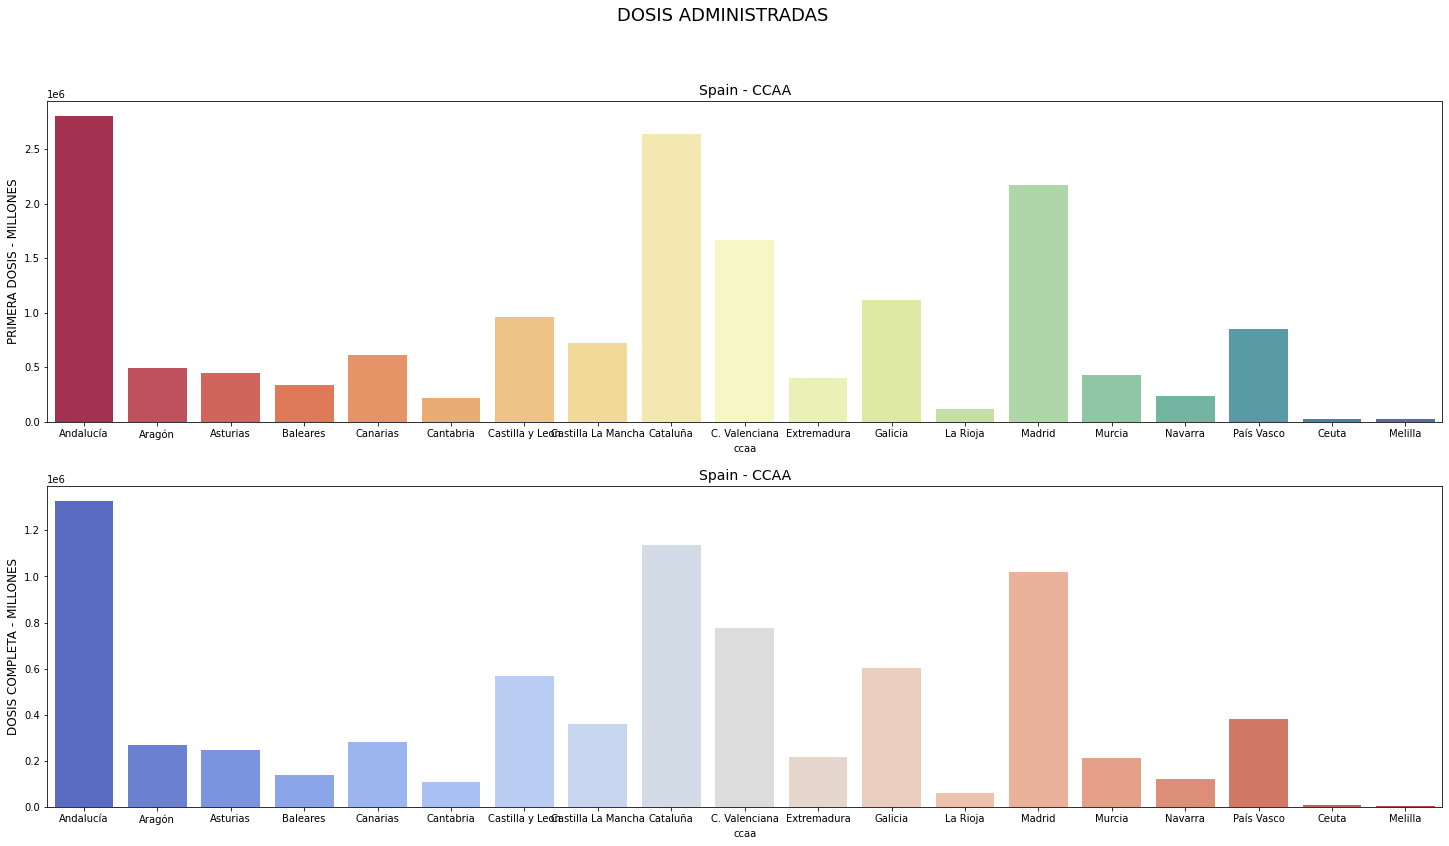

In [34]:
grafica_unadosis_dosiscompleta(df1)

# RESTAURANTES ESPAÑA (TripAdvisor) 🥘

In [35]:
df = pd.read_csv('df_tripAd_Spain_Restaurants.csv') 
df_tablatotal_region_tripAd = pd.read_csv('df_tablatotal_region_restaurant.csv')

In [36]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

**TRIPADVISOR-CCAA**

In [37]:
df_tablatotal_region_tripAd.rename(columns={'region':'ccaa', 'total restaurantes': 'total_restaurantes'})  

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

**VACUNAS CCAA**

In [38]:
df_tablatotal_region_vacunas = df1[['ccaa', 'dosisAdministradas']]
df_tablatotal_region_vacunas  

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [13]:
df_tablatotal_region_vacunas.to_csv('df_tablatotal_region_vacunas.csv', header=True, index=False)  #GUARDAMOS para streamlit

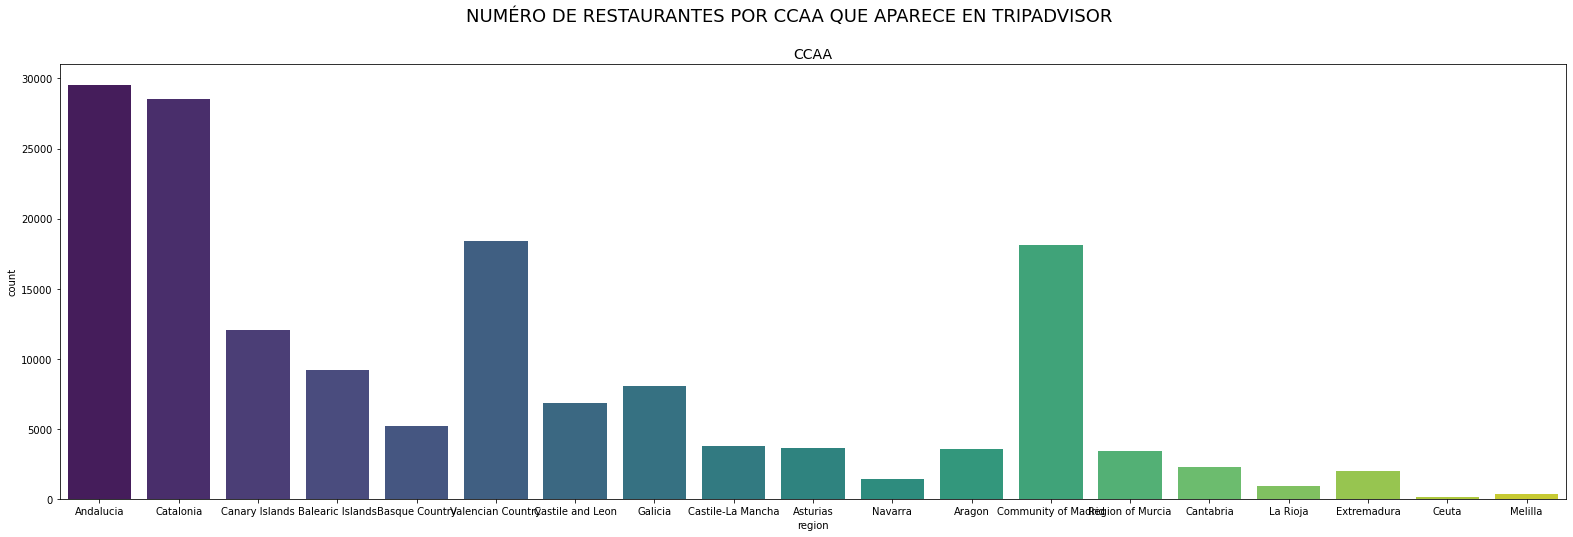

In [39]:
grafica_ccaa_total_tripAD(df)

In [40]:
df_tablatotal_region_vacunas.sort_values(ascending=False, inplace=True, by=['dosisAdministradas'])  #ORDEN ASCENDENTE

c:\users\christian\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:5477: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [97]:
#df_merge = pd.merge(df_tablatotal_region_tripAd, df_tablatotal_region_vacunas, on='ccaa')  -> INTENTAMOS HACER UN MERGE

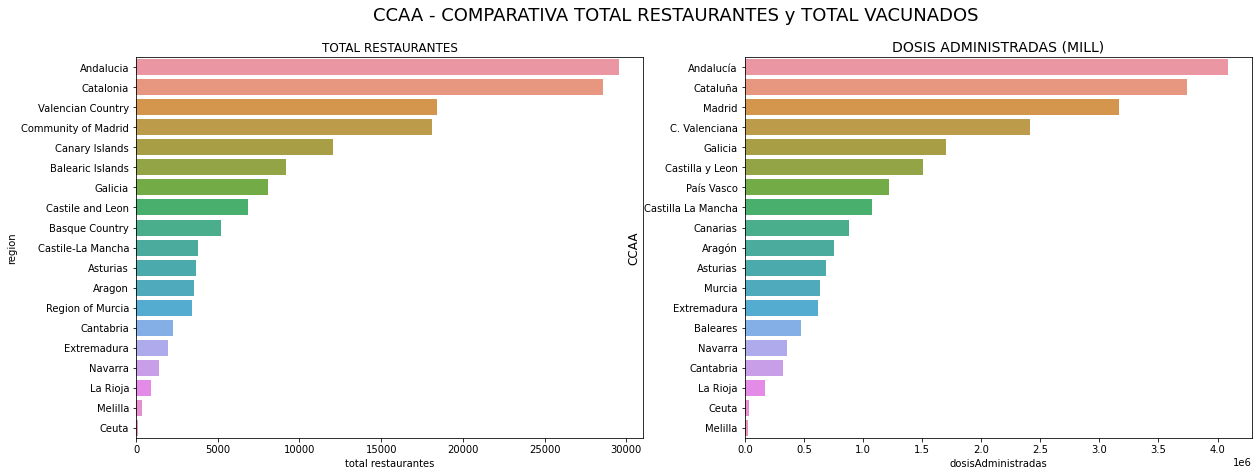

In [41]:
grafica_comparativa_CCAA_tripYvacu(df_tablatotal_region_tripAd, df_tablatotal_region_vacunas)

### VALORACIONES INTERESANTES POR PARTE DE LOS USUARIOS ⭐⭐⭐⭐⭐

In [42]:
df['avg_rating'] = df['avg_rating'].str.replace('4.5','4.0')
df['avg_rating'] = df['avg_rating'].str.replace('3.5','3.0')
df['avg_rating'] = df['avg_rating'].str.replace('2.5','2.0')
df['avg_rating'] = df['avg_rating'].str.replace('1.5','1.0')

<ipython-input-42-201aa5d3fe61>:1: FutureWarning:The default value of regex will change from True to False in a future version.
<ipython-input-42-201aa5d3fe61>:2: FutureWarning:The default value of regex will change from True to False in a future version.
<ipython-input-42-201aa5d3fe61>:3: FutureWarning:The default value of regex will change from True to False in a future version.
<ipython-input-42-201aa5d3fe61>:4: FutureWarning:The default value of regex will change from True to False in a future version.


In [43]:
df['food'] = df['food'].replace(4.5, 4.0)
df['food'] = df['food'].replace(3.5, 3.0)
df['food'] = df['food'].replace(2.5, 2.0)
df['food'] = df['food'].replace(1.5, 1.0)

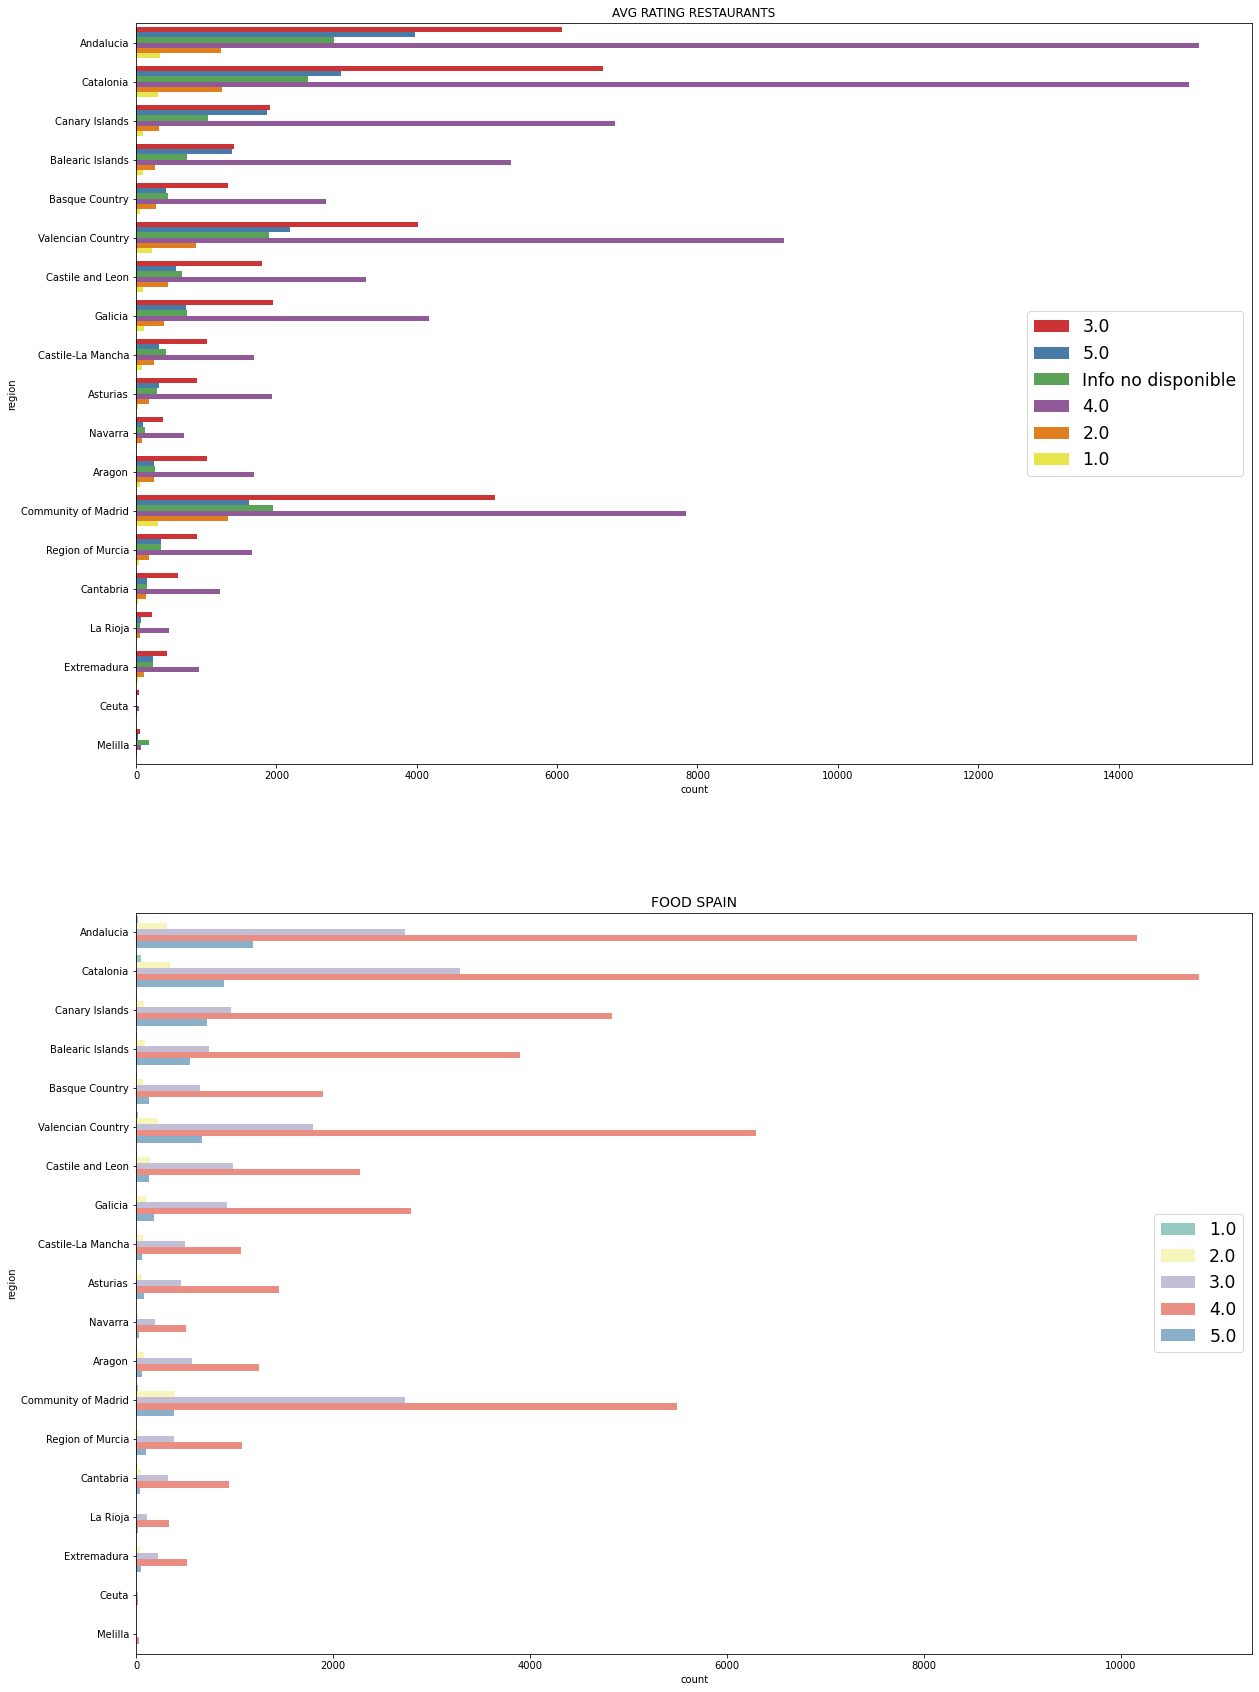

In [44]:
graficas_ratings(df)

## GEOLOCALIZACIÓN OPCIÓN A COMIDA VEGANA- LA GOMERA  🥗  🥩

In [44]:
i = Image(url='vegan_options_GOMERA_.JPG')
i

In [35]:
def grafica_comparativa_CCAA_tripYvacu(df_tablatotal_region_tripAd, df_tablatotal_region_vacunas):
    gridsize = (1, 2)
    fig = plt.figure(figsize=(20, 7))

    ax1 = plt.subplot2grid(gridsize, (0, 0))
    ax2 = plt.subplot2grid(gridsize, (0, 1))

    ax1= sns.barplot(y=('region'), x=('total restaurantes'), data=df_tablatotal_region_tripAd, ax= ax1)
    ax1.set_title('TOTAL RESTAURANTES')

    ax2 = sns.barplot(y=('ccaa'), x=('dosisAdministradas'), data=df_tablatotal_region_vacunas, ax= ax2)
    ax2.set_title('DOSIS ADMINISTRADAS (MILL)', fontsize=14)
    ax2.set_ylabel('CCAA', fontsize=12 )


    fig.suptitle('CCAA - COMPARATIVA TOTAL RESTAURANTES y TOTAL VACUNADOS', fontsize=18)
    plt.show()


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1 = sns.barplot(y =df1.ccaa, x=df1.dosisEntregadasPfizer, ax= ax1, palette='dark:salmon_r')
ax1.set_title('Dosis Entregadas PFISER')
ax1.set_ylabel('CCAA')
#ax1.set_xlabel(xmin=df1.dosisEntregadasPfizer[0], xmax=df1.dosisEntregadasPfizer[-1])

ax2= sns.barplot(y =df1.ccaa, x=df1.dosisEntregadasModerna, ax= ax2, palette='mako')
ax2.set_title('Dosis Entregadas MODERNA')
ax2.set_ylabel(' ')


fig.suptitle('DOSIS ENTREGADAS DISTRIBUIDAS')
plt.show()

In [ ]:
def grafica_unadosis_dosiscompleta(df1):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 13))

    ax1 = sns.barplot(x =df1.ccaa, y=df1.dosisPrimeraDosis, ax= ax1, palette='Spectral')
    ax1.set_title('Spain - CCAA')
    ax1.set_ylabel('PRIMERA DOSIS')

    ax2= sns.barplot(x =df1.ccaa, y=df1.dosisPautaCompletada, ax= ax2, palette='coolwarm')
    ax2.set_title('Spain - CCAA')
    ax2.set_ylabel('DOSIS COMPLETA')

    fig.suptitle('DOSIS ADMINISTRADAS')
    plt.show()